In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_pickle("data/doh_merged_2.pkl")
df2 = pd.read_pickle("data/AmazonRing/ring_merged.pkl")
df3 = pd.read_pickle("data/Reolink/reo_merged.pkl")
df4 = pd.read_pickle("data/Telekom/telekom_magenta_homebase2.pkl")

#### Over/Undersampling dataset

In [3]:
# Shorten label names
df1['label'] = "NoLabel"
df2['label'] = "Spotlight Cam"
df3['label'] = "Argus PT"
df4['label'] = "HomeBase2"

In [4]:
sampling_before = {}
for df in [df1, df2, df3, df4]:
  print(df.iloc[0]['label'], len(df))
  sampling_before[df.iloc[0]['label']] = len(df)

NoLabel 2759326
Spotlight Cam 146591
Argus PT 34049
HomeBase2 3292


In [5]:
n = 34049 # Number of Reolink Argus PT rows

df1 = df1.sample(n=n, replace=False)
df2 = df2.sample(n=n, replace=False)
df3 = df3.sample(n=n, replace=False)
df4 = df4.sample(n=n, replace=True)


In [6]:
sampling_after = {}
for df in [df1, df2, df3, df4]:
  print(df.iloc[0]['label'], len(df))
  sampling_after[df.iloc[0]['label']] = len(df)

NoLabel 34049
Spotlight Cam 34049
Argus PT 34049
HomeBase2 34049


In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

trace1 = fig.add_trace(
    go.Bar(
      x=list(sampling_before.keys()),
      y=list(sampling_before.values()),
      name="Before Under-/Over-sampling",
      text=list(sampling_before.values())
      ),
    row=1, col=1
)

trace2 = fig.add_trace(
    go.Bar(x=list(sampling_after.keys()), y=list(sampling_after.values()), name="After Under-/Over-sampling",text=list(sampling_after.values())),
    row=1, col=2
)

# fig.update_traces(textposition='top')
fig.update_yaxes(type="log")
fig.update_layout(
  height=300, 
  width=900, 
  yaxis_title="Number of packets",
  # title_text="Size of label groups in dataset",
  # paper_bgcolor='rgba(0,0,0,0)',
  # plot_bgcolor='rgba(0,0,0,0)'
  )
fig.update_layout(
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="left",
    x=0
    )
  )
fig.update_layout(margin=dict(t=10, b=10))
fig.show()
fig.write_image("assets/sampling.pdf")

In [8]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [9]:
df.columns

Index(['time', 'payload', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_len', 'IP_id',
       'IP_flags', 'IP_frag', 'IP_ttl', 'IP_proto', 'IP_chksum', 'IP_src',
       'IP_dst', 'TCP_sport', 'TCP_dport', 'TCP_seq', 'TCP_ack', 'TCP_dataofs',
       'TCP_reserved', 'TCP_flags', 'TCP_window', 'TCP_chksum', 'TCP_urgptr',
       'UDP_sport', 'UDP_dport', 'UDP_len', 'UDP_chksum', 'Raw_load',
       'IP_int_arr_time', 'IP_Burst_ix', 'IP_Burst_length',
       'IP_Burst_avg_size', 'label'],
      dtype='object')

In [10]:
import datetime

df['IP_version'] = df['IP_version'].astype("string")
df['label'] = df['label'].astype("string")
na_values = {
  # "time": 0,
  "payload": "NoPayload",
  "IP_version": "0",
  "IP_ihl": 0,
  "IP_tos": 0,
  "IP_len": 0,
  "IP_id": 0,
  "IP_flags": 0,
  "IP_frag": 0,
  "IP_ttl": 0,
  "IP_proto": 0,
  "IP_chksum": 0,
  "IP_src": "0",
  "IP_dst": "0",
  "TCP_sport": "0",
  "TCP_dport": "0",
  "TCP_seq": 0,
  "TCP_ack": 0,
  "TCP_dataofs": 0,
  "TCP_reserved": 0,
  "TCP_flags": 0,
  "TCP_window": 0,
  "TCP_chksum": 0,
  "TCP_urgptr": 0,
  "UDP_sport": "0",
  "UDP_dport": "0",
  "UDP_len": 0,
  "UDP_chksum": 0,
  "Raw_load": 0,
  'IP_int_arr_time': datetime.timedelta(seconds=0), 
  'IP_Burst_ix': 0, 
  'IP_Burst_length': 0,
  'IP_Burst_avg_size': 0,
  "label": "NoLabel",
}

df.fillna(value=na_values, inplace=True)

In [11]:
for col in df.columns:
  print(col, "NA", sum(df[col].isna()), "out of", len(df[col]))

time NA 0 out of 136196
payload NA 0 out of 136196
IP_version NA 0 out of 136196
IP_ihl NA 0 out of 136196
IP_tos NA 0 out of 136196
IP_len NA 0 out of 136196
IP_id NA 0 out of 136196
IP_flags NA 0 out of 136196
IP_frag NA 0 out of 136196
IP_ttl NA 0 out of 136196
IP_proto NA 0 out of 136196
IP_chksum NA 0 out of 136196
IP_src NA 0 out of 136196
IP_dst NA 0 out of 136196
TCP_sport NA 0 out of 136196
TCP_dport NA 0 out of 136196
TCP_seq NA 0 out of 136196
TCP_ack NA 0 out of 136196
TCP_dataofs NA 0 out of 136196
TCP_reserved NA 0 out of 136196
TCP_flags NA 0 out of 136196
TCP_window NA 0 out of 136196
TCP_chksum NA 0 out of 136196
TCP_urgptr NA 0 out of 136196
UDP_sport NA 0 out of 136196
UDP_dport NA 0 out of 136196
UDP_len NA 0 out of 136196
UDP_chksum NA 0 out of 136196
Raw_load NA 0 out of 136196
IP_int_arr_time NA 0 out of 136196
IP_Burst_ix NA 0 out of 136196
IP_Burst_length NA 0 out of 136196
IP_Burst_avg_size NA 0 out of 136196
label NA 0 out of 136196


In [12]:
# for col in df.select_dtypes('string').columns:
#   df[col] = df[col].astype("category")

# for col in df.select_dtypes('category').columns:
#   df[col] = df[col].astype("string")

In [13]:
df.sample(10)

,time,payload,IP_version,IP_ihl,IP_tos,IP_len,IP_id,IP_flags,IP_frag,IP_ttl,...,UDP_sport,UDP_dport,UDP_len,UDP_chksum,Raw_load,IP_int_arr_time,IP_Burst_ix,IP_Burst_length,IP_Burst_avg_size,label
110184,2021-09-02 15:38:47.360977920,NoPayload,4,5,0,40,25951,2,0,52,...,0,0,0,0,1,0 days 00:00:00.001442048,0,0,0.0,HomeBase2
101748,2021-09-05 09:29:49.851301888,Raw,4,5,0,56,12111,2,0,64,...,22813,43402,36,50594,28,0 days 00:00:00.021372672,0,0,0.0,Argus PT
128013,2021-09-02 15:36:49.173235968,NoPayload,4,5,0,52,57816,2,0,64,...,0,0,0,0,1,0 days 00:00:00.000325888,0,0,0.0,HomeBase2
4490,2021-09-26 13:18:05.521449216,NoPayload,4,5,0,52,688,2,0,230,...,0,0,0,0,1,0 days 00:00:00.000093184,0,0,0.0,NoLabel
54142,2021-09-15 06:42:42.285968128,Raw,4,5,0,1480,8265,0,0,249,...,0,0,0,0,1428,0 days 00:00:00.000439296,370,275,1422.72,Spotlight Cam
131364,2021-09-02 15:38:36.553911808,Raw,4,5,0,1450,25277,2,0,52,...,0,0,0,0,1410,0 days 00:00:00.000146688,201,1,874.5,HomeBase2
9836,2021-09-29 19:47:48.206978048,NoPayload,4,5,0,60,15910,2,0,64,...,0,0,0,0,1,0 days 00:00:00.694509824,0,0,0.0,NoLabel
64411,2021-09-15 06:42:47.206322944,Raw,4,5,0,1480,14343,0,0,249,...,0,0,0,0,1428,0 days 00:00:00.000660992,446,232,1424.89,Spotlight Cam
65288,2021-07-10 11:56:35.646832128,Raw,4,5,0,641,23679,0,0,49,...,51860,9078,621,26488,613,0 days 00:00:00.008214528,0,0,0.0,Spotlight Cam
127229,2021-09-02 15:38:55.643543040,Padding,4,5,0,40,39578,2,0,64,...,0,0,0,0,1,0 days 00:00:00.020889088,0,0,0.0,HomeBase2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136196 entries, 0 to 136195
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   time               136196 non-null  datetime64[ns] 
 1   payload            136196 non-null  string         
 2   IP_version         136196 non-null  string         
 3   IP_ihl             136196 non-null  UInt8          
 4   IP_tos             136196 non-null  UInt8          
 5   IP_len             136196 non-null  UInt16         
 6   IP_id              136196 non-null  UInt16         
 7   IP_flags           136196 non-null  UInt8          
 8   IP_frag            136196 non-null  UInt16         
 9   IP_ttl             136196 non-null  UInt8          
 10  IP_proto           136196 non-null  UInt8          
 11  IP_chksum          136196 non-null  UInt16         
 12  IP_src             136196 non-null  string         
 13  IP_dst             136196 non

In [15]:
# training_features = [
#     # 'time',
#     # 'payload',
#     # 'IP_version',
#     # 'IP_ihl',
#     # 'IP_tos',
#     'IP_len',
#     # 'IP_id',
#     # 'IP_flags',
#     'IP_frag',
#     'IP_ttl',
#     'IP_proto',
#     'IP_chksum',
#     # 'IP_src',
#     # 'IP_dst',
#     'TCP_sport',
#     'TCP_dport',
#     'TCP_seq',
#     'TCP_ack',
#     'TCP_dataofs',
#     'TCP_reserved',
#     # 'TCP_flags',
#     'TCP_window',
#     'TCP_chksum',
#     'TCP_urgptr',
#     'UDP_sport',
#     'UDP_dport',
#     'UDP_len',
#     'UDP_chksum',
#     'Raw_load',
#     'IP_int_arr_time',
#     # 'IP_Burst_ix',
#     'IP_Burst_length',
#     'IP_Burst_avg_size',
#   ]

training_features = [
    'Raw_load',
    'IP_int_arr_time',
    'IP_Burst_length',
    'IP_Burst_avg_size',
  ]

# training_features = [
#     'Raw_load'
#   ]

# dimensionality of one hot would be too high for Ports, so we use their integer values
for col in ['TCP_sport', 'TCP_dport', 'UDP_sport', 'UDP_dport']:
  df[col] = df[col].astype("UInt32")

df['IP_int_arr_time'] = df['IP_int_arr_time'].dt.total_seconds() * 1000 # Convert timedelta to milliseconds
df['IP_int_arr_time'] = df['IP_int_arr_time'].astype('Float64')

In [16]:
df[training_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136196 entries, 0 to 136195
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Raw_load           136196 non-null  UInt16 
 1   IP_int_arr_time    136196 non-null  Float64
 2   IP_Burst_length    136196 non-null  int64  
 3   IP_Burst_avg_size  136196 non-null  Float64
dtypes: Float64(2), UInt16(1), int64(1)
memory usage: 3.8 MB


In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.4)

X = train[training_features]
X_test = test[training_features]

y = train['label']
y_test = test['label']

# enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
# enc.fit(df[one_hot_features])
# X = enc.transform(X)
# X_test = enc.transform(X_test)

lb = LabelBinarizer()
lb.fit(df['label'])
y = lb.transform(y)
y_test = lb.transform(y_test)

In [18]:
X.shape, X_test.shape

((81717, 4), (54479, 4))

## Classifiers

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X, y)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
weights = 'uniform'

neighbor = KNeighborsClassifier(n_neighbors=k, weights=weights)
neighbor = neighbor.fit(X, y)

In [21]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
machine = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
machine = machine.fit(X, y)

## Evaluation

### Forest

In [22]:
y_pred = forest.predict(X_test)

In [23]:
from sklearn import metrics

y_test = lb.inverse_transform(y_test)
y_pred = lb.inverse_transform(y_pred)

acc = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print(acc, f1_score)

0.916279667394776 0.9155691357402406


In [24]:
forest_df = pd.DataFrame(metrics.classification_report(y_test, y_pred, target_names=lb.classes_, output_dict=True))

In [25]:
forest_df

,Argus PT,HomeBase2,NoLabel,Spotlight Cam,accuracy,macro avg,weighted avg
precision,0.934353,0.933710,0.887762,0.907112,0.91628,0.915734,0.915607
recall,0.938395,0.992899,0.847627,0.887012,0.91628,0.916483,0.916280
f1-score,0.936370,0.962395,0.867230,0.896950,0.91628,0.915736,0.915569
support,13408.000000,13661.000000,13736.000000,13674.000000,0.91628,54479.000000,54479.000000


In [26]:
forest_df_crop = forest_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=1)
forest_df_crop = forest_df_crop.drop(['support'], axis=0)
print(forest_df_crop.style.to_latex(siunitx=True))

\begin{tabular}{lSSSS}
{} & {Argus PT} & {HomeBase2} & {NoLabel} & {Spotlight Cam} \\
precision & 0.934353 & 0.933710 & 0.887762 & 0.907112 \\
recall & 0.938395 & 0.992899 & 0.847627 & 0.887012 \\
f1-score & 0.936370 & 0.962395 & 0.867230 & 0.896950 \\
\end{tabular}



In [27]:
labels, counts = np.unique(y_test, return_counts=True)
for label, count_ in zip(labels, counts):
  print(f"{label}: {count_}")

Argus PT: 13408
HomeBase2: 13661
NoLabel: 13736
Spotlight Cam: 13674


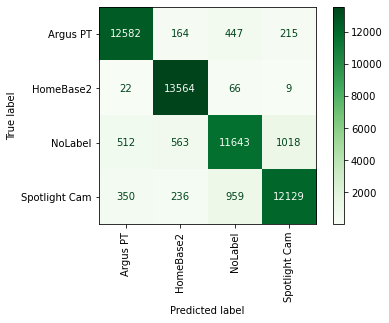

In [28]:
cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, xticks_rotation='vertical', cmap='Greens')

#### Feature Importance

In [29]:
# from sklearn.inspection import permutation_importance

# y_test = lb.transform(y_test)
# result = permutation_importance(
#     forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=4
# )

In [30]:
# import matplotlib.pyplot as plt


# fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# forest_importances = pd.Series(importances, index=training_features)

# forest_importances.plot.bar(yerr=std, ax=ax[0])
# ax[0].set_title("Feature importances using MDI")
# ax[0].set_ylabel("Mean decrease in impurity")

# forest_importances = pd.Series(result.importances_mean, index=training_features)
# forest_importances.plot.bar(yerr=result.importances_std, ax=ax[1])

# ax[1].set_title("Feature importances using permutation on full model")
# ax[1].set_ylabel("Mean accuracy decrease")

# fig.tight_layout()


In [31]:
from sklearn.inspection import permutation_importance

y_test = lb.transform(y_test)

importances = forest.feature_importances_
forest_importances_MDI = pd.Series(importances, index=training_features)
forest_importances_MDI_std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

importances = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=4
)
forest_importances_permute = pd.Series(importances.importances_mean, index=training_features)
forest_importances_permute_std = importances.importances_std

In [32]:

fig = make_subplots(rows=2, cols=1)

trace1 = fig.add_trace(
    go.Bar(
      x=training_features,
      y=forest_importances_MDI,
      error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=forest_importances_MDI_std,
            visible=True
            ),
      name="Feature importances using MDI",
      # text=forest_importances_MDI
      ),
    row=1, col=1
)

trace2 = fig.add_trace(
    go.Bar(
      x=training_features,
      y=forest_importances_permute,
      error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=forest_importances_permute_std,
            visible=True
            ),
      name="Feature importances using permutation",
      # text=forest_importances_permute
      ),
    row=2, col=1
)

fig.update_layout(
  height=600, 
  width=900, 
)
fig.update_layout(
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="left",
    x=0
    )
  )

fig.update_yaxes(title="Mean decrease in impurity", row=1, col=1)
fig.update_yaxes(title="Mean decrease in accuracy", row=2, col=1)
fig.update_layout(margin=dict(t=10, b=10))
fig.write_image("assets/feat_importances.pdf")
fig.show()

In [33]:

# fig = make_subplots(rows=1, cols=1)

# trace2 = fig.add_trace(
#     go.Bar(
#       x=training_features,
#       y=forest_importances_permute,
#       error_y=dict(
#             type='data', # value of error bar given in data coordinates
#             array=forest_importances_permute_std,
#             visible=True
#             ),
#       name="Feature importances using permutation",
#       # text=forest_importances_permute
#       ),
#     row=1, col=1
# )

# fig.update_layout(
#   height=400, 
#   width=600, 
# )
# fig.update_layout(
#   legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="left",
#     x=0
#     )
#   )

# fig.update_yaxes(title="Mean decrease in accuracy", row=1, col=1)
# fig.update_layout(margin=dict(t=10, b=10))
# fig.write_image("assets/feat_importances_2.pdf")
# fig.show()

#### Optimization

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion for measuring the quality of a split
criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]}


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from pathlib import Path

best_forest_path = Path("rf_classifier.joblib")

if not best_forest_path.is_file():
  rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  rf_random.fit(X, y)

In [36]:
from joblib import dump, load

try:
  dump(rf_random.best_estimator_, best_forest_path)
except NameError:
  best_forest = load(best_forest_path)

In [47]:
best_forest_time = %timeit -o -p 10 -r 20 -n 20 y_pred = best_forest.predict(X_test.sample(1))

118.9982823 ms ± 20.02984691 ms per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [50]:
best_forest_time.average

0.11899828225000193

In [37]:
print(forest_df)


y_pred = best_forest.predict(X_test)

try:
  y_test = lb.inverse_transform(y_test)
except np.AxisError:
  print("y_test already in original form.")

try:
  y_pred = lb.inverse_transform(y_pred)
except np.AxisError:
  print("y_pred already in original form.")

acc = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

best_forest_df = pd.DataFrame(metrics.classification_report(y_test, y_pred, target_names=lb.classes_, output_dict=True))
print(best_forest_df)

               Argus PT     HomeBase2       NoLabel  Spotlight Cam  accuracy  \
precision      0.934353      0.933710      0.887762       0.907112   0.91628   
recall         0.938395      0.992899      0.847627       0.887012   0.91628   
f1-score       0.936370      0.962395      0.867230       0.896950   0.91628   
support    13408.000000  13661.000000  13736.000000   13674.000000   0.91628   

              macro avg  weighted avg  
precision      0.915734      0.915607  
recall         0.916483      0.916280  
f1-score       0.915736      0.915569  
support    54479.000000  54479.000000  
               Argus PT     HomeBase2       NoLabel  Spotlight Cam  accuracy  \
precision      0.942678      0.941756      0.908521       0.919925  0.928743   
recall         0.966513      0.994217      0.853888       0.901492  0.928743   
f1-score       0.954447      0.967276      0.880357       0.910615  0.928743   
support    13408.000000  13661.000000  13736.000000   13674.000000  0.928743   

In [38]:
print(best_forest_df.style.to_latex(siunitx=True))

\begin{tabular}{lSSSSSSS}
{} & {Argus PT} & {HomeBase2} & {NoLabel} & {Spotlight Cam} & {accuracy} & {macro avg} & {weighted avg} \\
precision & 0.942678 & 0.941756 & 0.908521 & 0.919925 & 0.928743 & 0.928220 & 0.928124 \\
recall & 0.966513 & 0.994217 & 0.853888 & 0.901492 & 0.928743 & 0.929027 & 0.928743 \\
f1-score & 0.954447 & 0.967276 & 0.880357 & 0.910615 & 0.928743 & 0.928174 & 0.927982 \\
support & 13408.000000 & 13661.000000 & 13736.000000 & 13674.000000 & 0.928743 & 54479.000000 & 54479.000000 \\
\end{tabular}



In [39]:
from sklearn import tree
import os

try:
  tree_ = tree.export_graphviz(
    rf_random.best_estimator_.estimators_[0],
    feature_names=training_features,
    max_depth=3,
    filled=True,
    rounded=True,
    out_file='assets/tree.dot'
    )

  os.system('dot -Tpdf assets/tree.dot -o assets/tree.pdf')
except NameError:
  pass

NameError: name 'rf_random' is not defined

### Neighbor

In [ ]:
y_pred = neighbor.predict(X_test)

In [ ]:
from sklearn import metrics

y_test = lb.inverse_transform(y_test)
y_pred = lb.inverse_transform(y_pred)

acc = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print(acc, f1_score)

0.8979423264009986 0.8974342862039901


In [ ]:
neighbor_df = pd.DataFrame(metrics.classification_report(y_test, y_pred, target_names=lb.classes_, output_dict=True))
neighbor_df

,Argus PT,HomeBase2,NoLabel,Spotlight Cam,accuracy,macro avg,weighted avg
precision,0.920330,0.853224,0.885658,0.940183,0.897942,0.899849,0.900051
recall,0.916215,0.975476,0.824373,0.877024,0.897942,0.898272,0.897942
f1-score,0.918268,0.910264,0.853917,0.907506,0.897942,0.897489,0.897434
support,13642.000000,13456.000000,13671.000000,13710.000000,0.897942,54479.000000,54479.000000


In [ ]:
neighbor_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=1, inplace=True)
neighbor_df.drop(['support'], axis=0, inplace=True)
print(neighbor_df.style.to_latex(siunitx=True))

\begin{tabular}{lSSSS}
{} & {Argus PT} & {HomeBase2} & {NoLabel} & {Spotlight Cam} \\
precision & 0.920330 & 0.853224 & 0.885658 & 0.940183 \\
recall & 0.916215 & 0.975476 & 0.824373 & 0.877024 \\
f1-score & 0.918268 & 0.910264 & 0.853917 & 0.907506 \\
\end{tabular}



In [ ]:
labels, counts = np.unique(y_test, return_counts=True)
for label, count_ in zip(labels, counts):
  print(f"{label}: {count_}")

Argus PT: 13642
HomeBase2: 13456
NoLabel: 13671
Spotlight Cam: 13710


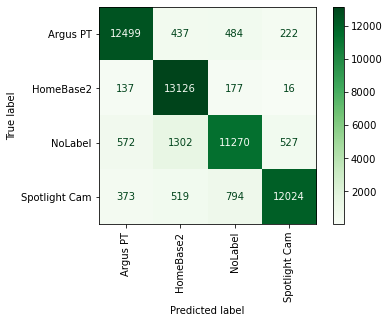

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, xticks_rotation='vertical', cmap='Greens')

### Machine

In [ ]:
y_pred = machine.predict(X_test)

In [ ]:
from sklearn import metrics

# y_test = lb.inverse_transform(y_test)
y_pred = lb.inverse_transform(y_pred)

acc = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print(acc, f1_score)

0.30446594100479085 0.2186136398660673


In [ ]:
machine_df = pd.DataFrame(metrics.classification_report(y_test, y_pred, target_names=lb.classes_, output_dict=True))
machine_df

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Argus PT,HomeBase2,NoLabel,Spotlight Cam,accuracy,macro avg,weighted avg
precision,0.292541,0.244843,0.0,0.538406,0.304466,0.268948,0.269223
recall,0.910497,0.142910,0.0,0.163603,0.304466,0.304253,0.304466
f1-score,0.442809,0.180479,0.0,0.250951,0.304466,0.218560,0.218614
support,13642.000000,13456.000000,13671.0,13710.000000,0.304466,54479.000000,54479.000000


In [ ]:
machine_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=1, inplace=True)
machine_df.drop(['support'], axis=0, inplace=True)
print(machine_df.style.to_latex(siunitx=True))

\begin{tabular}{lSSSS}
{} & {Argus PT} & {HomeBase2} & {NoLabel} & {Spotlight Cam} \\
precision & 0.292541 & 0.244843 & 0.000000 & 0.538406 \\
recall & 0.910497 & 0.142910 & 0.000000 & 0.163603 \\
f1-score & 0.442809 & 0.180479 & 0.000000 & 0.250951 \\
\end{tabular}



In [ ]:
labels, counts = np.unique(y_test, return_counts=True)
for label, count_ in zip(labels, counts):
  print(f"{label}: {count_}")

Argus PT: 13642
HomeBase2: 13456
NoLabel: 13671
Spotlight Cam: 13710


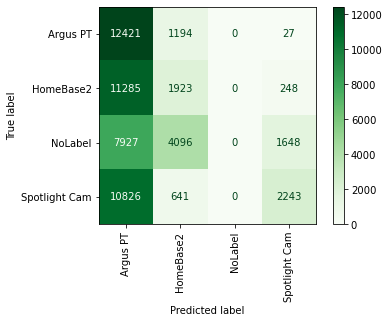

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, xticks_rotation='vertical', cmap='Greens')